In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("combine.csv", index_col=False)

In [3]:
data.head()

,Date,Time,TempComedor,TempHabit,WeatherTemp,CO2Comedor,CO2Habit,HumedadComedor,HumedadHabit,LightingComedor,...,MeteoExterior.3,MeteoExterior.4,MeteoExteriorPiranometro,ExteriorEntalpic1,ExteriorEntalpic2,ExteriorEntalpicturbo,TemperatureExteriorSensor,HumedadExteriorSensor,DayOfWeek,Target
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,12604.20,95436.8,758.880,0.0,0.0,0.0,18.1150,48.3750,2.0,no
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,10787.20,95436.8,762.069,0.0,0.0,0.0,18.4147,47.8080,2.0,no
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,9669.63,95398.6,766.251,0.0,0.0,0.0,18.8533,47.4320,2.0,no
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,9648.13,95360.3,766.037,0.0,0.0,0.0,19.2907,47.0240,2.0,no
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,9208.32,95354.9,762.743,0.0,0.0,0.0,19.7400,45.4743,2.0,no


In [4]:
data.drop(4137, inplace=True)

In [5]:
data.drop(['Date','Time', 'ExteriorEntalpic1', 'ExteriorEntalpic2', 'ExteriorEntalpicturbo'], axis=1, inplace=True)

In [6]:
data.tail()

,TempComedor,TempHabit,WeatherTemp,CO2Comedor,CO2Habit,HumedadComedor,HumedadHabit,LightingComedor,LightingHabit,Precipita,MeteoExterior,MeteoExterior.1,MeteoExterior.2,MeteoExterior.3,MeteoExterior.4,MeteoExteriorPiranometro,TemperatureExteriorSensor,HumedadExteriorSensor,DayOfWeek,Target
4132,18.8000,18.2667,11.0000,199.424,201.963,43.0160,44.9813,21.8500,24.3493,0.0,617.067,0.295333,6636.54,35671.4,7454.38,124.496,14.4833,58.9920,3.0,no
4133,18.7713,18.2153,11.7333,199.200,202.091,43.1920,44.9413,21.1653,30.9693,0.0,618.133,0.174000,11818.30,71188.5,12526.90,256.597,14.7540,58.6213,3.0,no
4134,18.7860,18.2000,12.0000,199.435,201.739,43.3947,44.9333,21.2640,32.1933,0.0,619.285,0.246000,10836.30,69498.2,12597.90,281.568,15.2020,57.6960,3.0,no
4135,18.8133,18.2153,12.5333,200.107,200.597,43.3440,44.7013,28.1647,38.3507,0.0,620.139,0.181333,11722.10,79102.0,15796.90,354.645,15.7260,56.8613,3.0,no
4136,18.8600,18.2667,13.0000,200.149,199.541,43.6667,44.5653,31.1107,45.2000,0.0,621.248,0.340000,11819.70,81240.1,19035.50,404.992,16.2693,55.8907,3.0,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4137 entries, 0 to 4136
Data columns (total 20 columns):
TempComedor                  4137 non-null float64
TempHabit                    4137 non-null float64
WeatherTemp                  4137 non-null float64
CO2Comedor                   4137 non-null float64
CO2Habit                     4137 non-null float64
HumedadComedor               4137 non-null float64
HumedadHabit                 4137 non-null float64
LightingComedor              4137 non-null float64
LightingHabit                4137 non-null float64
Precipita                    4137 non-null float64
MeteoExterior                4137 non-null float64
MeteoExterior.1              4137 non-null float64
MeteoExterior.2              4137 non-null float64
MeteoExterior.3              4137 non-null float64
MeteoExterior.4              4137 non-null float64
MeteoExteriorPiranometro     4137 non-null float64
TemperatureExteriorSensor    4137 non-null float64
HumedadExteriorSensor     

In [8]:
data.corr()

,TempComedor,TempHabit,WeatherTemp,CO2Comedor,CO2Habit,HumedadComedor,HumedadHabit,LightingComedor,LightingHabit,Precipita,MeteoExterior,MeteoExterior.1,MeteoExterior.2,MeteoExterior.3,MeteoExterior.4,MeteoExteriorPiranometro,TemperatureExteriorSensor,HumedadExteriorSensor,DayOfWeek
TempComedor,1.000000,0.994919,0.772240,-0.004932,0.009122,-0.497667,-0.573693,0.110584,0.000168,-0.215531,0.075435,0.337980,0.284684,-0.218541,-0.087284,0.122728,0.869988,-0.596304,0.064133
TempHabit,0.994919,1.000000,0.783311,0.002666,0.027100,-0.505706,-0.582998,0.144716,0.035226,-0.210272,0.092716,0.358063,0.284238,-0.203725,-0.055689,0.152910,0.877810,-0.594614,0.056466
WeatherTemp,0.772240,0.783311,1.000000,0.065182,0.061737,-0.381388,-0.457232,0.445576,0.368208,-0.120134,0.389228,0.600489,0.446112,-0.012035,0.289022,0.482812,0.913790,-0.600642,-0.004574
CO2Comedor,-0.004932,0.002666,0.065182,1.000000,0.921147,0.007569,-0.006710,0.210973,0.201988,-0.077145,0.118342,0.016163,0.139729,0.024964,0.266481,0.202645,0.059812,-0.024068,-0.109505
CO2Habit,0.009122,0.027100,0.061737,0.921147,1.000000,-0.016113,-0.015423,0.187347,0.171437,-0.079018,0.096919,-0.004526,0.111899,0.013415,0.238168,0.172644,0.052735,-0.010945,-0.101870
HumedadComedor,-0.497667,-0.505706,-0.381388,0.007569,-0.016113,1.000000,0.953278,-0.111464,-0.064680,0.031794,-0.060707,-0.300701,-0.092636,-0.048443,-0.005352,-0.087956,-0.398176,0.735952,-0.020140
HumedadHabit,-0.573693,-0.582998,-0.457232,-0.006710,-0.015423,0.953278,1.000000,-0.170723,-0.125465,0.111310,-0.094034,-0.308020,-0.128181,-0.074913,-0.070145,-0.152502,-0.475858,0.828931,-0.046759
LightingComedor,0.110584,0.144716,0.445576,0.210973,0.187347,-0.111464,-0.170723,1.000000,0.934732,-0.109877,0.637038,0.569098,0.434846,0.432066,0.880722,0.955442,0.440234,-0.301732,0.026073
LightingHabit,0.000168,0.035226,0.368208,0.201988,0.171437,-0.064680,-0.125465,0.934732,1.000000,-0.111371,0.631014,0.476659,0.300701,0.583702,0.938664,0.922889,0.329092,-0.236751,0.031790
Precipita,-0.215531,-0.210272,-0.120134,-0.077145,-0.079018,0.031794,0.111310,-0.109877,-0.111371,1.000000,-0.019014,0.134216,-0.108825,-0.103857,-0.125103,-0.134381,-0.201824,0.286478,-0.080620


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

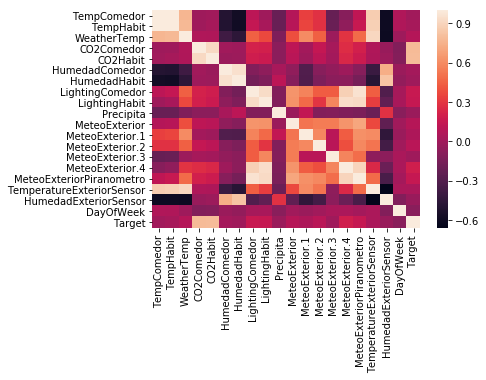

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Target"] = labelencoder.fit_transform(data.iloc[:, 19].values)

sns.heatmap(data.corr())

In [11]:
data.columns

Index(['TempComedor', 'TempHabit', 'WeatherTemp', 'CO2Comedor', 'CO2Habit',
       'HumedadComedor', 'HumedadHabit', 'LightingComedor', 'LightingHabit',
       'Precipita', 'MeteoExterior', 'MeteoExterior.1', 'MeteoExterior.2',
       'MeteoExterior.3', 'MeteoExterior.4', 'MeteoExteriorPiranometro',
       'TemperatureExteriorSensor', 'HumedadExteriorSensor', 'DayOfWeek',
       'Target'],
      dtype='object')

In [12]:
X = data.iloc[:, 0:19].values
X

array([[18.1875, 17.8275,  0.    , ..., 18.115 , 48.375 ,  2.    ],
       [18.4633, 18.1207,  6.8   , ..., 18.4147, 47.808 ,  2.    ],
       [18.7673, 18.4367, 17.    , ..., 18.8533, 47.432 ,  2.    ],
       ...,
       [18.786 , 18.2   , 12.    , ..., 15.202 , 57.696 ,  3.    ],
       [18.8133, 18.2153, 12.5333, ..., 15.726 , 56.8613,  3.    ],
       [18.86  , 18.2667, 13.    , ..., 16.2693, 55.8907,  3.    ]])

In [13]:
y = data.iloc[:, 19].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
data["Target"] = labelencoder.fit_transform(data.iloc[:, 19].values)


In [15]:
y.shape

(4137,)

In [16]:
X.shape

(4137, 19)

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 1.93786159,  1.99131801,  2.40196752, ...,  2.41525809,
        -1.1007543 ,  0.005237  ],
       [-1.74650152, -1.75257741, -0.46052666, ..., -1.05239962,
         0.56115408,  0.51095567],
       [ 0.62913537,  0.57041   ,  0.89538807, ...,  0.57395231,
        -0.8490014 ,  1.52239299],
       ...,
       [ 1.5127646 ,  1.44318094,  2.08558742, ...,  2.09351115,
        -2.03121114,  0.51095567],
       [ 0.906418  ,  0.87114297,  0.66940228, ...,  1.08809835,
         0.14970657, -1.51191899],
       [ 0.97134636,  0.95799284,  0.66940228, ...,  0.60995181,
        -0.83537192, -1.00620033]])

In [19]:
# Importing Keras and Libraries

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
# Adding the input layer 
model.add(Dense(units = 10 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

# Adding the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
3309/3309 [==============================] - 4s 1ms/step - loss: 0.2600 - acc: 0.9888
Epoch 2/100
3309/3309 [==============================] - 1s 426us/step - loss: 0.0231 - acc: 0.9909
Epoch 3/100
3309/3309 [==============================] - 1s 407us/step - loss: 0.0170 - acc: 0.9909
Epoch 4/100
3309/3309 [==============================] - 1s 423us/step - loss: 0.0148 - acc: 0.9909
Epoch 5/100
3309/3309 [==============================] - 2s 540us/step - loss: 0.0134 - acc: 0.9909
Epoch 6/100
3309/3309 [==============================] - 2s 515us/step - loss: 0.0125 - acc: 0.9909
Epoch 7/100
3309/3309 [==============================] - 1s 424us/step - loss: 0.0115 - acc: 0.9909
Epoch 8/100
3309/3309 [==============================] - 1s 439us/step - loss: 0.0108 - acc: 0.9909
Epoch 9/100
3309/3309 [==============================] - 2s 493us/step - loss: 0.0100 - acc: 0.9909
Epoch 10/100
3309/3309 [==============================] - 2s 546us/step - loss: 0.0095 - acc: 0.9918
E

3309/3309 [==============================] - 1s 159us/step - loss: 4.0399e-04 - acc: 1.0000
Epoch 82/100
3309/3309 [==============================] - 1s 162us/step - loss: 4.9606e-04 - acc: 1.0000
Epoch 83/100
3309/3309 [==============================] - 1s 155us/step - loss: 0.0014 - acc: 0.9997
Epoch 84/100
3309/3309 [==============================] - 1s 167us/step - loss: 5.9635e-04 - acc: 1.0000
Epoch 85/100
3309/3309 [==============================] - 1s 160us/step - loss: 4.6442e-04 - acc: 1.0000
Epoch 86/100
3309/3309 [==============================] - 0s 150us/step - loss: 3.6229e-04 - acc: 1.0000
Epoch 87/100
3309/3309 [==============================] - 1s 156us/step - loss: 0.0029 - acc: 0.9991
Epoch 88/100
3309/3309 [==============================] - 1s 161us/step - loss: 6.4295e-04 - acc: 0.9997
Epoch 89/100
3309/3309 [==============================] - 1s 166us/step - loss: 0.0013 - acc: 0.9994
Epoch 90/100
3309/3309 [==============================] - 1s 161us/step - loss: 

In [33]:
# keras library import  for Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()

with open("model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_num.h5")

In [34]:
# load json and create model
json_file = open('model_num.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_num.h5")
print("Loaded model from disk")

loaded_model.save('model_num.hdf5')
loaded_model=load_model('model_num.hdf5')


Loaded model from disk


/home/jephtah/anaconda3/envs/deep_learn/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [48]:
predictions = loaded_model.predict(new_data)

predicted = 0
if predictions < 1:
    predicted = 0
else:
    predicted = 1
    
print("No Fire")
    

No Fire


In [37]:
X_train[1].shape

(19,)

In [39]:
data = X_train[1]

In [41]:
new_data = data.reshape(1,19)

In [53]:
y = loaded_model.predict_classes(new_data)

In [54]:
y

array([[0]], dtype=int32)

In [55]:
loaded_model.predict(new_data)

array([[7.358937e-28]], dtype=float32)